<a href="https://colab.research.google.com/github/sheraphineshovan/Code-Casa/blob/main/Email_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

#**Email Spam**

---





**About Dataset**

   - The SMS Spam Collection is a set of SMS tagged messages that have been
     collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

**Objective**


   - The objective of this project is to develop a machine learning model capable of accurately classifying SMS messages as either "spam" or "ham" (legitimate). By leveraging state-of-the-art natural language processing techniques and machine learning algorithms, our aim is to create a robust and effective SMS spam detection system that enhances user communication experiences by filtering out unwanted and potentially harmful messages. The project will involve data preprocessing, feature extraction, model training, and rigorous evaluation to achieve a high level of accuracy in identifying spam messages while minimizing false positives and false negatives.

Approach

   1. Load the Data and The Libraries
   2. Data Preparation and Data Transformation
    - Check for null values
    - Check for duplicate rows
    - Convert all the text into Lowercase
    - Remove all the special characters
    - Remove all the stop words
    - Lemmatization and Stemming
   3. Vectorization - TFIDF Vectorizer
   4. Data Encoding and Data Splitting
   5. Models
        - Random Forest
        - MultinomialNB
        - Support Vector Machine

# Load the Data and The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import tensorflow as tf


In [2]:
df=pd.read_csv("/content/SMS Spam Collection Dataset.zip",encoding="latin1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Preparation and Data Transformation

In [7]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
# from initial analysis,it is clear that the last 3 columns contains mostly null values hence it is dropped

**Checking for null values**


---


In [8]:
df.isnull().sum()
# there is no null values

v1    0
v2    0
dtype: int64

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

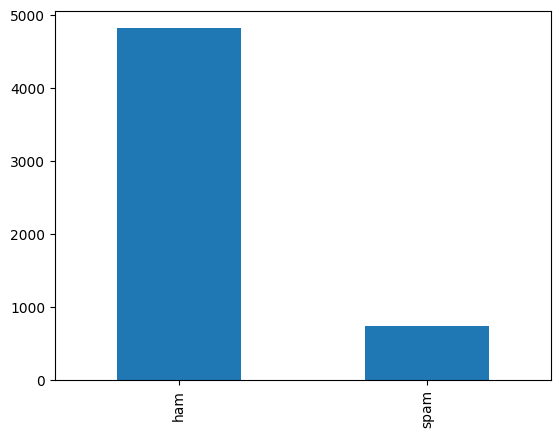

In [10]:
df['v1'].value_counts().plot(kind='bar')

**Checking for duplicate values**


---


In [11]:
df.duplicated().sum()
# the are 403 duplicated(repeated) rows are there

403

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
#hence dropped the duplicated rows

0

**Convert all the text into Lowercase,
Remove all the special characters,
Remove all the stop words,
Lemmatization and Stemming**


---




In [14]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [15]:
from nltk.corpus import stopwords

In [16]:

nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df['v2'] = df['v2'].map(lambda s:preprocess(s))

In [18]:
df['v2']

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5169, dtype: object

# Vectorization - TFIDF Vectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [21]:
x = vect.fit_transform(df['v2'])
# converting words into vectors

In [22]:
x.shape
# 5169 entries and 7386 tokens

(5169, 7386)

In [23]:
type(x)

scipy.sparse._csr.csr_matrix

# Data Encoding and Data Splitting

- Label Encoder


In [24]:
le = LabelEncoder()

In [25]:
y = le.fit_transform(df['v1'])

- Train and Test Split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 123)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3876, 7386)
(3876,)
(1293, 7386)
(1293,)


# Random Forest

- To find the best hyperparameters, Random search cv has been used

In [28]:
random_grid = {
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [130, 180, 230]
    }

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
clf = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,verbose = 2,random_state=123)

In [ ]:
search = clf.fit(x_train,y_train)

In [33]:
search.best_params_
# best parameters for random forest

{'n_estimators': 130,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'gini'}

In [34]:
rf = RandomForestClassifier(n_estimators=130,
 min_samples_split=10,
 min_samples_leaf = 1,
 max_depth= None,
criterion= 'gini')
# declaring the model with the provided hyperparameters

In [35]:
rf.fit(x_train.toarray(),y_train)
rf_preds_train = rf.predict(x_train.toarray())
rf_preds_test = rf.predict(x_test.toarray())
# fitting the train and test data

In [36]:
print('Accuracy score for train data : ', round(accuracy_score(y_train, rf_preds_train),2))
print('Accuracy score for test data : ', round(accuracy_score(y_test, rf_preds_test),2))

Accuracy score for train data :  1.0
Accuracy score for test data :  0.96


# MultinomialNB

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
nb = MultinomialNB()

In [39]:
nb.fit(x_train.toarray(),y_train)
nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())

In [40]:
print('Accuracy score for train data : ', round(accuracy_score(y_train, nb_preds_train),2))
print('Accuracy score for test data : ', round(accuracy_score(y_test, nb_preds_test),2))

Accuracy score for train data :  0.97
Accuracy score for test data :  0.94


# Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC()

In [43]:
from scipy.stats import reciprocal, randint
param_dist = {
    'C': reciprocal(0.1, 10),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'] + list(reciprocal(0.01, 0.1).rvs(size=3)),  # Kernel coefficient for 'poly', 'rbf', 'sigmoid'
    'degree': randint(2, 5),  # Degree of the polynomial kernel function
    'coef0': reciprocal(0.1, 10)  # Independent term in kernel function
}

In [44]:
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [45]:
search1 = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [46]:
search1.best_params_

{'C': 0.2502734407706272,
 'coef0': 3.224323679703529,
 'degree': 4,
 'gamma': 0.06469330337028337,
 'kernel': 'poly'}

In [47]:
svc = SVC(C= 0.3321408221627493,
 coef0=6.852383815557032,
 degree= 2,
 gamma= 'scale',
 kernel= 'linear')

In [48]:
svc.fit(x_train.toarray(),y_train)
svc_preds_train = svc.predict(x_train.toarray())
svc_preds_test = svc.predict(x_test.toarray())

In [49]:
print('Accuracy score for train data : ', round(accuracy_score(y_train, svc_preds_train),2))
print('Accuracy score for test data : ', round(accuracy_score(y_test, svc_preds_test),2))

Accuracy score for train data :  0.98
Accuracy score for test data :  0.95


# Creating App using Gradio

In [ ]:
!pip install gradio

In [51]:
import gradio as gr

In [61]:
def transform(input_text):
    transformed_input = preprocess(input_text)
    vectorized_input = vect.transform([transformed_input])
    result = rf.predict_proba(vectorized_input)[0]
    return {"ham": float(result[0]), "spam": float(result[1])}

# Define the Gradio interface
demo = gr.Interface(
    fn=transform,
    inputs=gr.Textbox(),
    outputs='label'
)

# Launch the interface
demo.launch(share=True)








Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2a1c617437ff0fbb66.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
